In [10]:
%load_ext autoreload
%autoreload 2

[autoreload of platform failed: Traceback (most recent call last):
  File "C:\Users\Laurin\Miniconda3\envs\deep_learning\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
  File "C:\Users\Laurin\Miniconda3\envs\deep_learning\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
  File "C:\Users\Laurin\Miniconda3\envs\deep_learning\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
  File "C:\Users\Laurin\Miniconda3\envs\deep_learning\lib\site-packages\IPython\extensions\autoreload.py", line 317, in update_class
  File "C:\Users\Laurin\Miniconda3\envs\deep_learning\lib\site-packages\IPython\extensions\autoreload.py", line 280, in update_instances
TypeError: __class__ assignment: 'uname_result' object layout differs from 'uname_result'
]


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import gzip
import time 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
try:
    from lsh import LSH
    from utils import *
except:
    sys.path.append("../src")
    print("path to src files: {}".format(sys.path[-1]))
    from lsh import LSH
    from utils import *

In [12]:
path = "../../../../data/"
file_train = "train-images-idx3-ubyte.gz"

In [13]:
def plot_img_from_idx(idx):
    img = pixel_data[idx].reshape(np.sqrt(784).astype("int"),np.sqrt(784).astype("int"))
    plt.imshow(img)

In [14]:
data = load_mnist(path)

In [15]:
labels = data[1]
pixel_data = data[0]
del data

In [16]:
f"dimensionality of an image is {len(pixel_data[0])}"

'dimensionality of an image is 784'

In [20]:
lsh = LSH(pixel_data[:60000], 1000, 5, hash_func="cosine", dist_metric="cosine")
start = time.time()
lsh.build_hashtables()
print(f"building hash tables took {time.time()-start} seconds")

building hash tables took 667.7712852954865 seconds


In [17]:
lsh_eu = LSH(pixel_data[:3000], 3000, 15, hash_func="cosine", dist_metric="euclidean", bucket_width=57886)
lsh_eu.build_hashtables()

## Query

In [18]:
query_idx = 7020

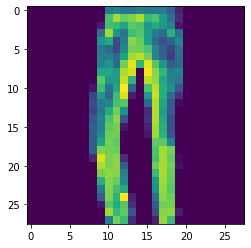

In [19]:
plot_img_from_idx(query_idx)

## Top 5 retrievel cosine

In [20]:
anns = lsh.get_near_duplicates(pixel_data[query_idx], num_duplicates=20, add_query_to_db=False)

../src\lsh.py:21: RuntimeWarning: divide by zero encountered in true_divide
  return 1-np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))


In [21]:
k = 8

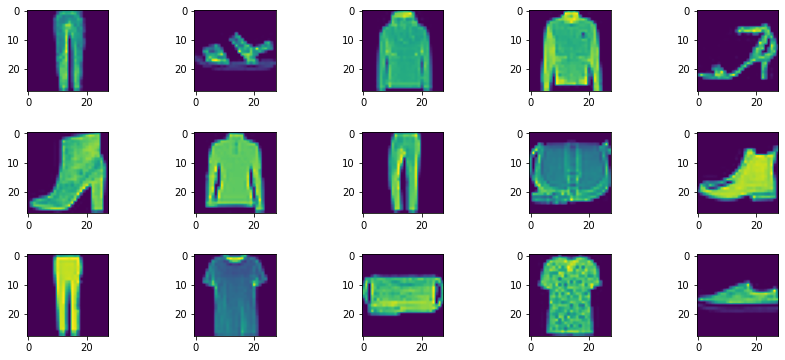

In [22]:
fig, axs = plt.subplots(3,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(15):
    idx = anns[i][0]
    img = pixel_data[idx].reshape(np.sqrt(784).astype("int"),np.sqrt(784).astype("int"))
    axs[i].imshow(img)
    #axs[i].plot(anna[])

## Top 5 retrievel euclidean

In [23]:
anns_eu = lsh_eu.get_near_duplicates(pixel_data[query_idx], num_duplicates=20)

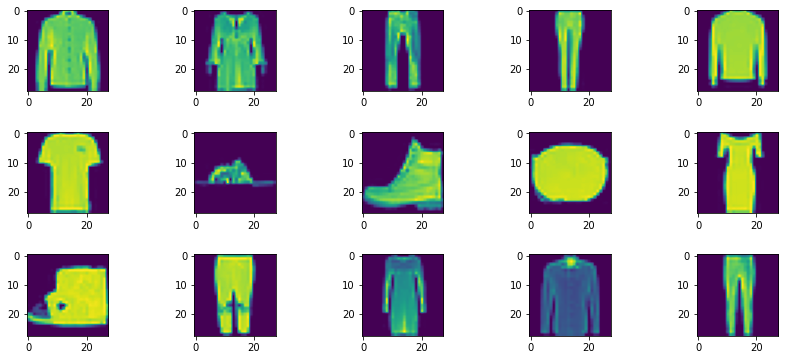

In [24]:
fig, axs = plt.subplots(3,5, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()

for i in range(15):
    idx = anns_eu[i][0]
    img = pixel_data[idx].reshape(np.sqrt(784).astype("int"),np.sqrt(784).astype("int"))
    axs[i].imshow(img)
    #axs[i].plot(anna[])

In [25]:
query_cat = labels[300]

In [26]:
query_cat

5

In [27]:
cats_ret_cos = [labels[neighbor[0]] for neighbor in anns]
accuracy_cos = np.sum(np.array(cats_ret_cos)==query_cat)/len(anns)

In [28]:
cats_ret_eu = [labels[neighbor[0]] for neighbor in anns_eu]
accuracy_eu = np.sum(np.array(cats_ret_eu)==query_cat)/len(anns_eu)

In [29]:
print("cosine sim found in {} percent of the cases a similar image with the same category. Euclidean in {} percent of the cases". format(accuracy_cos, accuracy_eu))

cosine sim found in 0.1 percent of the cases a similar image with the same category. Euclidean in 0.05 percent of the cases


In [30]:
x = pixel_data[query_idx]
y = x

In [41]:
lsh.calc_dist_euclidean(x,y)

0.0